In [1]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import pylab as pl
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
# whole dataset

df = pd.read_csv('all_nyc_spatial_auto.csv')

In [9]:
#NOTE some column names truncated

df.columns.values

# df.dtypes[df.dtypes=='object']

array(['FIPS', 'quadrant', 'geometry', 'avg_down', 'avg_up', 'max_down',
       'max_up', 'num_providers', 'num_platforms', 'top_plat_type',
       'top_plat_ratio', 'bscore_raw', 'bscore_norm', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'NumBldgs', 'NumFloors', 'UnitsRes',
       'UnitsTotal', 'Building Type_Commercial & Office Buildings',
       'Building Type_Industrial & Manufacturing Buildings',
       'Building Type_Mixed Residential & Commercial Buildings',
       'Building Type_Multi-Family Elevator Buildings',
       'Building Type_Multi-Family Walk-Up Buildings',
       'Building Type_One & Two Family Buildings',
       'Building Type_Open Space & Outdoor Recreation',
       'Building Type_Parking Facilities',
       'Building Type_Public Facilities & Institutions',
       'Building Type_Transportation & Utility',
       'Building Type_Vacant Land', 'Population Density (per sq. mile)',
       'Area (Lan

In [11]:
# df.dtypes

#### Preprocessing

In [30]:
# filter to inputs 
remove_list = ['FIPS','avg_down','avg_up','max_down','max_up','num_providers','top_plat_ratio',
               'bscore_raw','bscore_norm','geometry','quadrant','boro']

data = df.drop(remove_list,1)
data = pd.get_dummies(data=data, columns=['top_plat_type'])

#convert to array
data_ar = np.asarray(data)

In [32]:
# check for and replace NaNs/infinities, etc
# np.any(np.isnan(data_ar))
# np.all(np.isfinite(data_ar))

# convert to real numbers
data_ar = np.nan_to_num(data_ar)

In [33]:
# whiten data - standard normalize - PCA uses zero-centered data
data_norm = (data_ar - data_ar.mean())*1.0/data_ar.std()

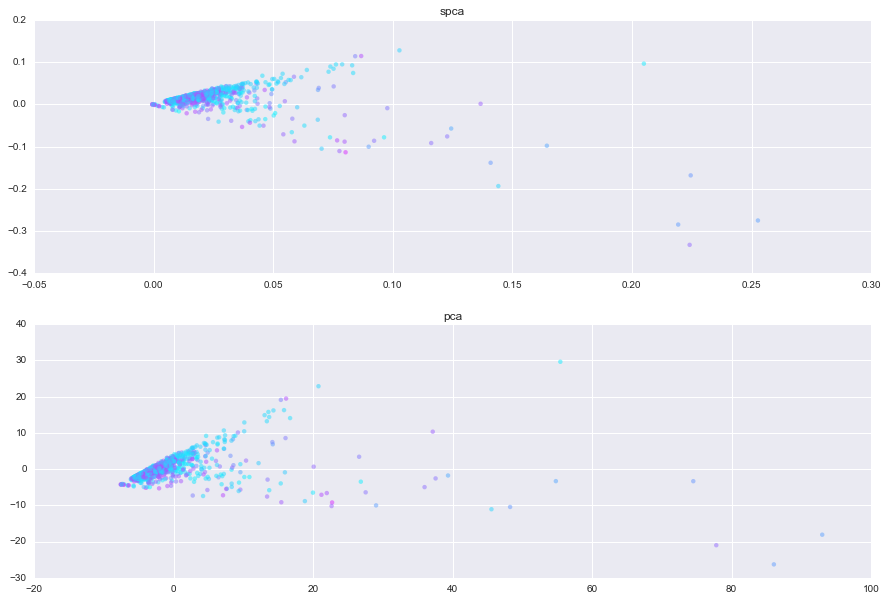

In [36]:
fig = pl.figure(figsize=(15,10))

spca = SparsePCA(n_components=5,alpha=.5,verbose=False,method='lars')
X_proj = spca.fit_transform(data_norm)
pl.subplot(211)
pl.scatter(X_proj[:, 0], X_proj[:, 1], c=df['bscore_norm'], edgecolor='none', alpha=0.5,
            cmap=pl.cm.cool)
pl.title('spca')


pl.subplot(212)
pca = PCA(n_components=5)
X_proj = pca.fit_transform(data_norm)
pl.scatter(X_proj[:, 0], X_proj[:, 1], c=df['bscore_norm'], edgecolor='none', alpha=0.5,
            cmap=pl.cm.cool)
pl.title('pca');

In [37]:
print("\nLeading principal component:\n", spca.components_[0,:])
print("Features in leading principal component:\n",data.columns[spca.components_[0,:]!=0.0])


Leading principal component:
 [   0.          279.35195589  139.95111851  137.82262293    0.
   12.33965691   14.93079048    3.59346382    0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.84125292    0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.           

,ALAND,AWATER,Area_Tot_1,Area_Total,Area__Land,Average_Ho,BldgArea,Buildin_10,Building_1,Building_2,...,Workers_32,Workers_33,Workers_34,Workers_35,num_platfo,w_percent,top_plat_t_Cable,top_plat_t_Copper,top_plat_t_Fiber,top_plat_t_Fixed_wireless
0,104645.0,0.0,0.0,0.040356,0.040356,2.58,2638633.0,0.0,3.0,0.0,...,303.0,311.0,63.0,67.0,3.0,72.651168,0.0,0.0,1.0,0.0
1,82641.0,0.0,0.0,0.032101,0.032101,2.92,1448392.0,8.0,1.0,8.0,...,249.0,254.0,79.0,25.0,3.0,77.373096,1.0,0.0,0.0,0.0
2,184733.0,0.0,0.0,0.071326,0.071326,3.19,2565407.0,12.0,1.0,21.0,...,471.0,351.0,115.0,11.0,3.0,77.879046,0.0,0.0,1.0,0.0
3,150832.0,0.0,0.0,0.057306,0.057306,3.25,1465566.0,0.0,0.0,3.0,...,409.0,587.0,36.0,84.0,3.0,90.691417,0.0,1.0,0.0,0.0
4,212430.0,0.0,0.0,0.082020,0.082020,3.32,3185383.0,13.0,6.0,47.0,...,601.0,549.0,231.0,248.0,3.0,68.893028,0.0,1.0,0.0,0.0
